In [ ]:
# To Use the Nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Natural Language toolkit
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer as wnl
from nltk.stem import PorterStemmer as ps
# Evaluation of model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,ConfusionMatrixDisplay

In [ ]:


df = pd.read_table('Restaurant_Reviews.tsv')
Data = df.to_csv('restaurant_reviews.csv',index=False)

Data = pd.read_csv('restaurant_reviews.csv')
Data.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_table('Restaurant_Reviews.tsv')
Data = df.to_csv('restaurant_reviews.csv',index=False)

In [ ]:
Data = pd.read_csv('restaurant_reviews.csv')
Data.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
Data.describe(include='all')

,Review,Liked
count,1000,1000.00000
unique,996,NaN
top,I would not recommend this place.,NaN
freq,2,NaN
mean,NaN,0.50000
std,NaN,0.50025
min,NaN,0.00000
25%,NaN,0.00000
50%,NaN,0.50000
75%,NaN,1.00000


In [ ]:
# Count of Unique Sentences that checks the duplicates also
print(Data.Review.value_counts())

Review
I would not recommend this place.                                                                     2
The food was terrible.                                                                                2
I won't be back.                                                                                      2
I love this place.                                                                                    2
And the chef was generous with his time (even came around twice so we can take pictures with him).    1
                                                                                                     ..
OMG, the food was delicioso!                                                                          1
There is nothing authentic about this place.                                                          1
the spaghetti is nothing special whatsoever.                                                          1
Of all the dishes, the salmon was the best, but all were 

In [ ]:
print(Data.Liked.value_counts())

Liked
1    500
0    500
Name: count, dtype: int64


In [ ]:
# Drop the Duplicates
Data.drop_duplicates(Data,inplace=True)


In [ ]:
# Now Data is Same Structure ans removed the Duplicates
print(Data.Review.value_counts().count())
print(Data.Liked.count())

996
996


In [ ]:
# No missing Values
Data.isnull().sum()

,0
Review,0
Liked,0


<Axes: xlabel='Liked', ylabel='count'>

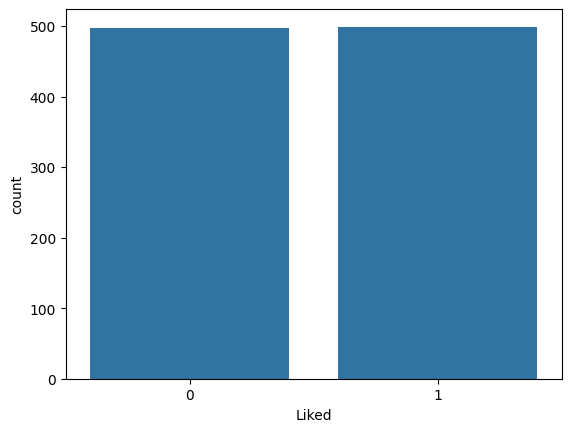

In [ ]:
# Create the Barplt for the liked
sns.countplot(x='Liked',data=Data)

In [ ]:
# Now split the Data into the Features and traget variable
X = Data['Review']
Y  = Data['Liked']

In [ ]:
X.head(3)

,Review
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.


In [ ]:
Y.head(3)

,Liked
0,1
1,0
2,0


In [ ]:
# Now convert the all the review Data into lowercase

X = X.str.lower()
X.head(3)

,Review
0,wow... loved this place.
1,crust is not good.
2,not tasty and the texture was just nasty.


In [ ]:
# Now remove noise from the Data like Puntuations , digit or symbols

import string
string.punctuation

X = X.str.translate(str.maketrans('','',string.punctuation))
X.head(3)

,Review
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty


In [ ]:
# make the tokens of the reivews

X = X.str.split()


In [ ]:
X.head(10)

,Review
0,"[wow, loved, this, place]"
1,"[crust, is, not, good]"
2,"[not, tasty, and, the, texture, was, just, nasty]"
3,"[stopped, by, during, the, late, may, bank, ho..."
4,"[the, selection, on, the, menu, was, great, an..."
5,"[now, i, am, getting, angry, and, i, want, my,..."
6,"[honeslty, it, didnt, taste, that, fresh]"
7,"[the, potatoes, were, like, rubber, and, you, ..."
8,"[the, fries, were, great, too]"
9,"[a, great, touch]"


In [ ]:
# Now Removing the Stopwords from the Reviews

X = X.apply(lambda x: [word for word in x if word not in stopwords.words('english')])
X.head(10)

,Review
0,"[wow, loved, place]"
1,"[crust, good]"
2,"[tasty, texture, nasty]"
3,"[stopped, late, may, bank, holiday, rick, stev..."
4,"[selection, menu, great, prices]"
5,"[getting, angry, want, damn, pho]"
6,"[honeslty, didnt, taste, fresh]"
7,"[potatoes, like, rubber, could, tell, made, ah..."
8,"[fries, great]"
9,"[great, touch]"


In [ ]:
# Now apply the stemmer for the covert the data into its root form

X = X.apply(lambda x:[wnl().lemmatize(word) for word in x])
X.head(10)

,Review
0,"[wow, loved, place]"
1,"[crust, good]"
2,"[tasty, texture, nasty]"
3,"[stopped, late, may, bank, holiday, rick, stev..."
4,"[selection, menu, great, price]"
5,"[getting, angry, want, damn, pho]"
6,"[honeslty, didnt, taste, fresh]"
7,"[potato, like, rubber, could, tell, made, ahea..."
8,"[fry, great]"
9,"[great, touch]"


In [ ]:
# Now remove the tense words in root form

X = X.apply(lambda x:[ps().stem(word) for word in x])
X.head(10)

,Review
0,"[wow, love, place]"
1,"[crust, good]"
2,"[tasti, textur, nasti]"
3,"[stop, late, may, bank, holiday, rick, steve, ..."
4,"[select, menu, great, price]"
5,"[get, angri, want, damn, pho]"
6,"[honeslti, didnt, tast, fresh]"
7,"[potato, like, rubber, could, tell, made, ahea..."
8,"[fri, great]"
9,"[great, touch]"


In [ ]:
# After the cleaning we have to join the all reviews again

X = X.apply(lambda x:' '.join(x))
X.head(10)

,Review
0,wow love place
1,crust good
2,tasti textur nasti
3,stop late may bank holiday rick steve recommen...
4,select menu great price
5,get angri want damn pho
6,honeslti didnt tast fresh
7,potato like rubber could tell made ahead time ...
8,fri great
9,great touch


In [ ]:
# Now Apply the Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)



In [ ]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=0)


In [ ]:
logic_model = LogisticRegression()
logic_model.fit(x_train,y_train);

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       144
           1       0.84      0.69      0.76       155

    accuracy                           0.77       299
   macro avg       0.78      0.77      0.77       299
weighted avg       0.78      0.77      0.77       299

76.92307692307693 %
[[123  21]
 [ 48 107]]


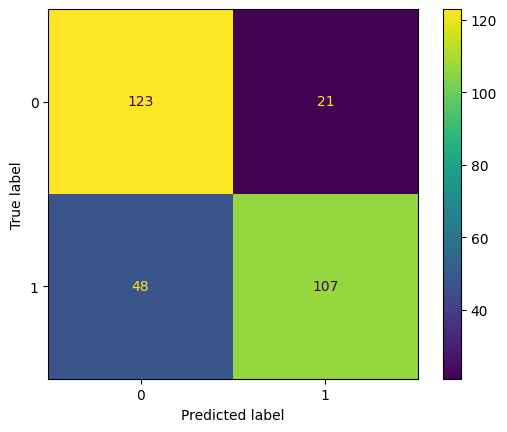

In [ ]:
# Logistics Model prediction
y_pred = logic_model.predict(x_test);

# Evlauate the All

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100 ,"%")

# Display the Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Model 2   --- naive Bayes
from sklearn.naive_bayes import MultinomialNB

naive_model = MultinomialNB()
naive_model.fit(x_train,y_train)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       144
           1       0.81      0.75      0.78       155

    accuracy                           0.78       299
   macro avg       0.78      0.78      0.78       299
weighted avg       0.78      0.78      0.78       299

Accuracy --> 77.59197324414716 %
[[116  28]
 [ 39 116]]


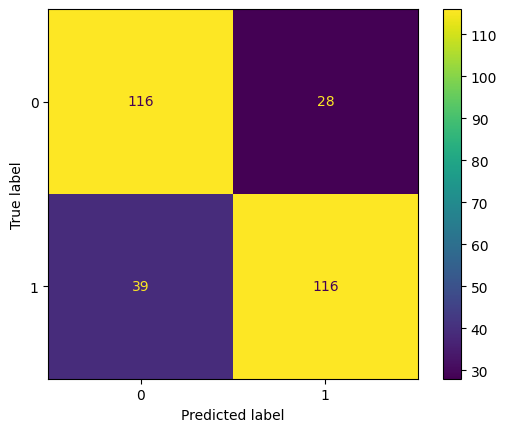

In [ ]:
y_pred = naive_model.predict(x_test.toarray())

print(classification_report(y_test,y_pred))
print("Accuracy -->",accuracy_score(y_test,y_pred)*100 ,"%")
cm = confusion_matrix(y_test,y_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Mode 3  --> Decision Tree

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       144
           1       0.72      0.74      0.73       155

    accuracy                           0.71       299
   macro avg       0.71      0.71      0.71       299
weighted avg       0.71      0.71      0.71       299

Accuracy --> 71.23745819397993 %
[[ 99  45]
 [ 41 114]]


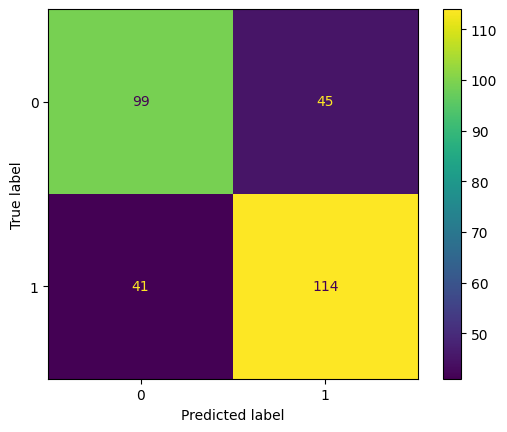

In [ ]:
y_pred = tree_model.predict(x_test)

print(classification_report(y_test,y_pred))
print("Accuracy -->",accuracy_score(y_test,y_pred)*100 ,"%")
cm = confusion_matrix(y_test,y_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Model 4 --> Random Forest

from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()
forest_model.fit(x_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.68      0.85      0.76       144
           1       0.82      0.63      0.71       155

    accuracy                           0.74       299
   macro avg       0.75      0.74      0.73       299
weighted avg       0.75      0.74      0.73       299

Accuracy --> 73.57859531772574 %
[[122  22]
 [ 57  98]]


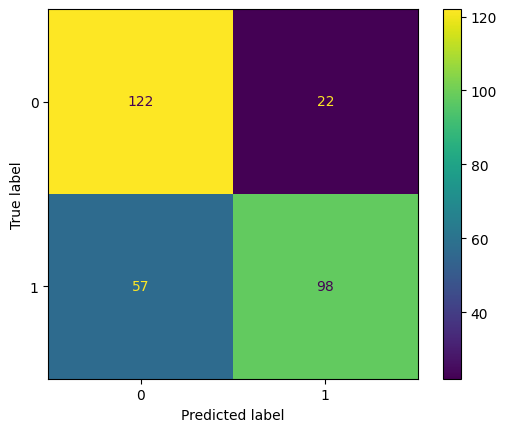

In [ ]:
y_pred = forest_model.predict(x_test)

print(classification_report(y_test,y_pred))
print("Accuracy -->",accuracy_score(y_test,y_pred)*100 ,"%")
cm = confusion_matrix(y_test,y_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# model 5 --> KNN

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       144
           1       0.74      0.80      0.77       155

    accuracy                           0.75       299
   macro avg       0.75      0.75      0.75       299
weighted avg       0.75      0.75      0.75       299

Accuracy --> 75.25083612040135 %
[[101  43]
 [ 31 124]]


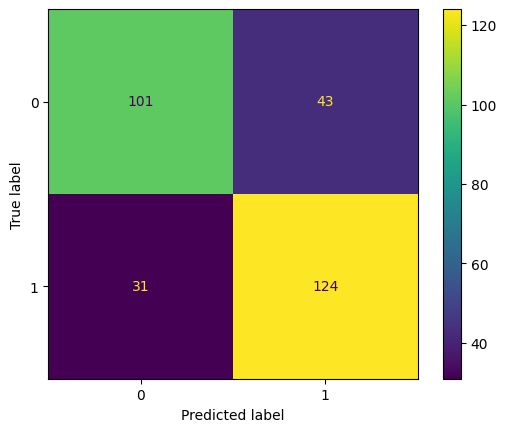

In [ ]:
y_pred = knn_model.predict(x_test)

print(classification_report(y_test,y_pred))
print("Accuracy -->",accuracy_score(y_test,y_pred)*100 ,"%")
cm = confusion_matrix(y_test,y_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Model 6--> Support Vector Machine

from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       144
           1       0.83      0.67      0.74       155

    accuracy                           0.76       299
   macro avg       0.77      0.76      0.76       299
weighted avg       0.77      0.76      0.76       299

Accuracy --> 75.91973244147158 %
[[123  21]
 [ 51 104]]


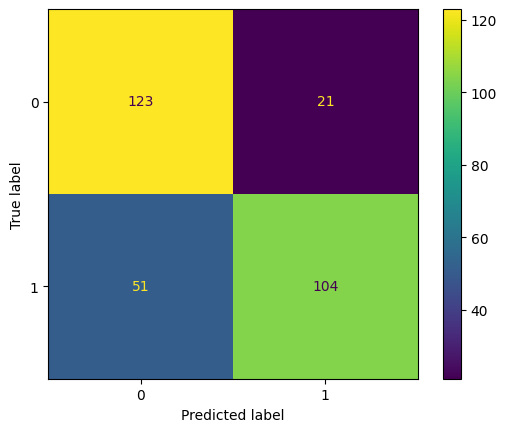

In [ ]:
y_pred = svm_model.predict(x_test)

print(classification_report(y_test,y_pred))
print("Accuracy -->",accuracy_score(y_test,y_pred)*100 ,"%")
cm = confusion_matrix(y_test,y_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Now Perform the Hyper parameter tuning on the two model  logistic regression

param_dist ={
    'C':[0.001,0.01,0.1,1,10,100,1000],
    'penalty':['l1','l2'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[100,1000,2500,5000]

}

In [ ]:
hyper_model = RandomizedSearchCV(
    estimator=logic_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [ ]:
hyper_model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, verbose=2)

In [ ]:
print(hyper_model.best_params_)

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 2500, 'C': 1}


In [ ]:
print(accuracy_score(y_test,hyper_model.predict(x_test))*100)

76.92307692307693


PerForm the HyperParameter Tuning Using GridSearchCV

In [ ]:
grid_model = GridSearchCV(
    estimator=logic_model,
    param_grid=param_dist,
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [ ]:
grid_model.fit(x_train,y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [ ]:
print(grid_model.best_estimator_)

LogisticRegression(C=10)


In [ ]:
print(grid_model.best_params_)

{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
print(accuracy_score(y_test,grid_model.predict(x_test))*100)

77.25752508361204


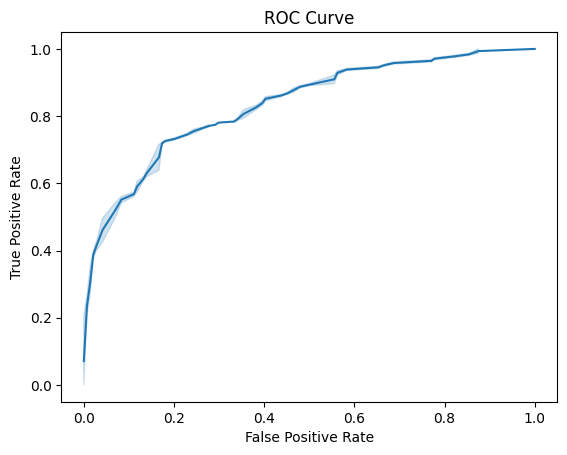

In [ ]:
# Draw the roc curve

y_pred_prob = grid_model.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)

sns.lineplot(x='fpr',y='tpr',data=pd.DataFrame({'fpr':fpr,'tpr':tpr}))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

**Model Performance Of Logistic and Multinomial Classifier --- > 77 %**

In [ ]:
import pickle

# Save Model
with open('model.pkl',"wb") as f:
  pickle.dump(grid_model,f)

# Save Vectorizer
with open('vectorizer.pkl',"wb") as f:
  pickle.dump(tfidf,f)